In [10]:
import numpy
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [11]:
data = pandas.read_csv(r'D:\desktop\Logistic Regression\data.csv')

In [12]:
data.shape

(569, 32)

In [13]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
data.drop('id', axis=1, inplace=True)

In [15]:
# converting the categorical data to continuous 
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data['diagnosis'].unique()

array([1, 0], dtype=int64)

In [16]:
feature_mean = list(data.columns[1:11])
feature_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

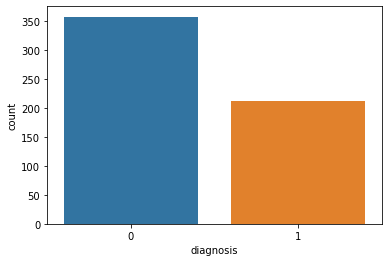

In [17]:
# we need to count if the dependent var is equal in number of categories
# for the balanced data metrics of measurement of accuracy is :- accuracy_score
# for the unbalanced data, metrics of measurement of accuracy is :- f1 score

import matplotlib.pyplot as plt
sns.countplot(data['diagnosis'], label='count')
plt.show()

In [18]:
# if the variables are having high correlation. if two or more vars have high correlation, we keep one of them and drop others

corr=data[feature_mean].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


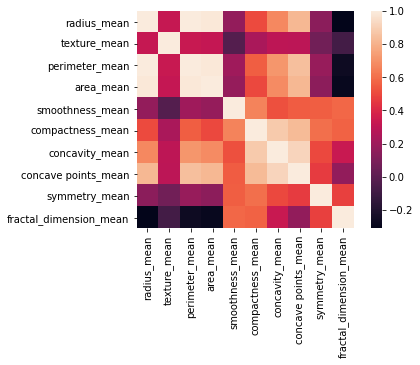

In [19]:
sns.heatmap(corr, cbar=True, square=True)
plt.show()

In [20]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [21]:
prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 
                  'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
prediction_var

['texture_mean',
 'perimeter_mean',
 'smoothness_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [22]:
train, test = train_test_split(data, test_size=0.3, random_state=5)
print("train shape is ", train.shape)
print("test shape is ", test.shape)

train shape is  (398, 31)
test shape is  (171, 31)


In [23]:
train_x = train[prediction_var]
test_x = test[prediction_var]
train_y=train['diagnosis']
test_y=test['diagnosis']

In [24]:
print("shape of train_x is ", train_x.shape)
print("shape of train_y is ", train_y.shape)
print("shape of test_x is ", test_x.shape)
print("shape of test_y is ", test_y.shape)

shape of train_x is  (398, 6)
shape of train_y is  (398,)
shape of test_x is  (171, 6)
shape of test_y is  (171,)


In [25]:
model=LogisticRegression()
model.fit(train_x, train_y)
pv = model.predict(test_x)
print("accuracy score of the model is ", accuracy_score(test_y, pv))

accuracy score of the model is  0.935672514619883


In [ ]:
import numpy
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

 

wine=pd.read_csv('C:\\Users\\walia\\Downloads\\wine.csv')
wine.head(2)
wine.columns
#wine['                        Flavanoids','Nonflavanoid_phenols             ','customer_segment                                 ' ] = wine['                        Flavanoids','Nonflavanoid_phenols             ','customer_segment                                 ' ].map(lambda x: x.strip())
wine.rename(columns={"                        Flavanoids": "Flavanoids", "Nonflavanoid_phenols             ": "Nonflavanoid_phenols", "customer_segment                                 ": "customer_segment"},inplace= True)
wine.columns
wine.head()
wine.dropna(inplace=True)
wine['Nonflavanoid_phenols']=wine['Nonflavanoid_phenols'].replace('[%,]', '', regex=True).astype(float)
wine['Magnesium']=wine['Magnesium'].replace('[\$,]', '', regex=True).astype(float)
wine.Magnesium
wine['customer_segment']= wine['customer_segment'].str.upper()
wine['customer_segment']=wine['customer_segment'].map({'ONE':1,'2':2,'THREE':3})
wine['customer_segment'].unique()
wine
import matplotlib.pyplot as plt
sns.countplot(wine['customer_segment'], label='count')
plt.show()
feature = list(wine.columns[1:14])
feature
corr=wine[feature].corr()
corr

 

sns.heatmap(corr, cbar=True, square=True)
plt.show()

 

wine.columns
prediction_var = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', 'OD280', 'Proline', 'customer_segment']
prediction_var
wine
train, test = train_test_split(wine, test_size=0.3, random_state=5)
print("train shape is ", train.shape)
print("test shape is ", test.shape)
train_x = train[prediction_var]
test_x = test[prediction_var]
train_y=train['customer_segment']
test_y=test['customer_segment']
print("shape of train_x is ", train_x.shape)
print("shape of train_y is ", train_y.shape)
print("shape of test_x is ", test_x.shape)
print("shape of test_y is ", test_y.shape)
model=LogisticRegression(solver='newton-cg')
model.fit(train_x, train_y)
pv = model.predict(test_x)
print("accuracy score of the model is ", accuracy_score(test_y, pv))